## MSCA31008 Assignment2
### K means clustering and Gaussian Mixtures Model
### Sijie Li
### 01/30/2022

In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [2]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.set_printoptions(precision=3)

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
# load the data
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target 
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Select the numeric variables that you think are appropriate and useful. Use kmeans and Gaussian Mixture models.


In [6]:
#check all data type
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
boston["RAD"]=boston["RAD"].astype("category")
boston2=pd.get_dummies(boston,prefix='RAD')
boston2= pd.DataFrame(boston2)
boston2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'RAD_1.0', 'RAD_2.0', 'RAD_3.0',
       'RAD_4.0', 'RAD_5.0', 'RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0'],
      dtype='object')

In [8]:
# Select  variables for clustering
feature = ['CRIM','LSTAT','RM','AGE','INDUS','DIS']
X = boston2 [feature]
y = boston2['MEDV']

In [9]:
# examine the structure of the DataFrame object and scale the data
print('\nContents of Initial Data  ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(boston2)) 



Contents of Initial Data  ---------------

Number of Respondents = 506


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 6)
(152, 6)
(354,)
(152,)


In [11]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_test_scaler = scaler.transform(X_train)
print(X_test_scaler.min(axis=0))
print(X_test_scaler.max(axis=0))
#X_manual_scaled = (X_train - X_test.min(axis=0)) / (X_test.max(axis=0) - X_test.min(axis=0))
#print(np.allclose(X_test_scaler, X_manual_scaled))


[0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1.]


In [12]:
X_train = np.array(X_train)
X_train

array([[10.672, 23.98 ,  6.459, 94.8  , 18.1  ,  1.988],
       [ 7.367, 21.52 ,  6.193, 78.1  , 18.1  ,  1.936],
       [ 5.708,  7.74 ,  6.75 , 74.9  , 18.1  ,  3.332],
       ...,
       [ 0.179, 17.6  ,  5.67 , 28.8  ,  9.69 ,  2.799],
       [ 0.23 , 10.97 ,  6.326, 52.5  , 10.59 ,  4.355],
       [ 0.107,  5.57 ,  5.936, 19.5  ,  1.91 , 10.586]])

In [13]:
X_test_scaler

array([[0.12 , 0.614, 0.555, 0.946, 0.637, 0.09 ],
       [0.083, 0.546, 0.504, 0.774, 0.637, 0.085],
       [0.064, 0.166, 0.611, 0.742, 0.637, 0.232],
       ...,
       [0.002, 0.438, 0.404, 0.267, 0.319, 0.176],
       [0.002, 0.255, 0.53 , 0.511, 0.353, 0.341],
       [0.001, 0.106, 0.455, 0.171, 0.026, 1.   ]])

In [14]:
bostonscaled=pd.DataFrame(X_train,columns=X.columns)
bostonscaled

,CRIM,LSTAT,RM,AGE,INDUS,DIS
0,10.67180,23.98,6.459,94.8,18.10,1.9879
1,7.36711,21.52,6.193,78.1,18.10,1.9356
2,5.70818,7.74,6.750,74.9,18.10,3.3317
3,0.01311,4.81,7.249,21.9,1.22,8.6966
4,0.15086,18.06,5.454,92.7,27.74,1.8209
...,...,...,...,...,...,...
349,5.69175,14.98,6.114,79.8,18.10,3.5459
350,0.08370,5.39,7.185,38.9,3.44,4.5667
351,0.17899,17.60,5.670,28.8,9.69,2.7986
352,0.22969,10.97,6.326,52.5,10.59,4.3549


## K-means clustering

In [15]:
# Execute K means and run for loop to get "cluster center, cluster size" in the range (2,11) on train data
for k in range (2,11):
    x=KMeans(n_clusters=k, n_init=100, max_iter=300, tol=0.0001, verbose=0,random_state = 100).fit(bostonscaled)
    x.fit_predict(bostonscaled)

    centroids = x.cluster_centers_
    labels = x.labels_
    dataFrameClusterCenter=pd.DataFrame(centroids,columns=bostonscaled.columns)
    print("The below are clusterCenters are for k==",k)
    print(pd.DataFrame(centroids))
    
    print('\nCenters for the clusters are: ') 
    print(centroids.T)
    
    print('\nCluster Indicators for each data row are:') 
    print(labels)
    
    centroids_dataframe = pd.DataFrame(data=centroids)
    centroids_matrix = centroids_dataframe.values
    #centroids_matrix = centroids_matrix.transpose()
    
    print(centroids_matrix)
    print("\nThe cluster sizes are", np.bincount(labels))
    print("\nThe cluster proportions are", np.bincount(x.labels_)/len(x.labels_))
    

The below are clusterCenters are for k== 2
          0          1         2          3          4         5
0  5.595877  15.695782  6.194559  88.052607  14.131232  2.678728
1  0.293148   7.820699  6.447776  36.416783   6.165245  5.517620

Centers for the clusters are: 
[[ 5.596  0.293]
 [15.696  7.821]
 [ 6.195  6.448]
 [88.053 36.417]
 [14.131  6.165]
 [ 2.679  5.518]]

Cluster Indicators for each data row are:
[0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1
 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 

The below are clusterCenters are for k== 8
           0          1         2          3          4         5
0  11.051631  23.661818  5.839691  96.749091  17.845818  1.927371
1   0.205108   7.656667  6.430070  34.794737   6.099474  5.535477
2   1.254794  10.308636  6.465636  72.734091   9.075227  3.640293
3  54.887980  22.536000  5.967400  91.200000  18.100000  1.560360
4   0.115752   6.447838  6.545730  14.845946   5.814324  6.492343
5   0.763868   9.181000  6.383260  54.694000   6.738600  4.705568
6   3.650525  13.608246  6.165702  90.340351  19.833684  2.164825
7   0.467601  13.322245  6.413510  89.642857   7.382449  3.384469

Centers for the clusters are: 
[[11.052  0.205  1.255 54.888  0.116  0.764  3.651  0.468]
 [23.662  7.657 10.309 22.536  6.448  9.181 13.608 13.322]
 [ 5.84   6.43   6.466  5.967  6.546  6.383  6.166  6.414]
 [96.749 34.795 72.734 91.2   14.846 54.694 90.34  89.643]
 [17.846  6.099  9.075 18.1    5.814  6.739 19.834  7.382]
 [ 1.927  5.535  3.64   1.56   6.492

In [16]:
# On test data
for k in range (2,11):
    x=KMeans(n_clusters=k, n_init=100, max_iter=300, tol=0.0001, verbose=0,random_state = 100).fit(X_test_scaler)
    x.fit_predict(X_test_scaler)

    centroids = x.cluster_centers_
    labels = x.labels_
    dataFrameClusterCenter=pd.DataFrame(centroids,columns=bostonscaled.columns)
    print("The below are clusterCenters are for k==",k)
    print(pd.DataFrame(centroids))
    
    print('\nCenters for the clusters are: ') 
    print(centroids.T)
    
    print('\nCluster Indicators for each data row are:') 
    print(labels)
    
    centroids_dataframe = pd.DataFrame(data=centroids)
    centroids_matrix = centroids_dataframe.values
    #centroids_matrix = centroids_matrix.transpose()
    
    print(centroids_matrix)
    print("\nThe cluster sizes are", np.bincount(labels))
    print("\nThe cluster proportions are", np.bincount(x.labels_)/len(x.labels_))

The below are clusterCenters are for k== 2
          0         1         2         3         4         5
0  0.001692  0.167494  0.570614  0.422598  0.164983  0.437367
1  0.073673  0.420534  0.480354  0.888525  0.555020  0.140106

Centers for the clusters are: 
[[0.002 0.074]
 [0.167 0.421]
 [0.571 0.48 ]
 [0.423 0.889]
 [0.165 0.555]
 [0.437 0.14 ]]

Cluster Indicators for each data row are:
[1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0
 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1
 1 0 

The below are clusterCenters are for k== 7
          0         1         2         3         4         5
0  0.184710  0.658587  0.420895  0.954303  0.649611  0.052421
1  0.002918  0.152468  0.661442  0.747951  0.133205  0.209107
2  0.004739  0.393775  0.458820  0.859809  0.291965  0.283355
3  0.001019  0.093842  0.614798  0.187583  0.148536  0.502904
4  0.062977  0.338706  0.502549  0.888291  0.684594  0.112669
5  0.004219  0.242735  0.485637  0.424642  0.295981  0.330875
6  0.000705  0.184477  0.541062  0.413212  0.091263  0.693668

Centers for the clusters are: 
[[1.847e-01 2.918e-03 4.739e-03 1.019e-03 6.298e-02 4.219e-03 7.051e-04]
 [6.586e-01 1.525e-01 3.938e-01 9.384e-02 3.387e-01 2.427e-01 1.845e-01]
 [4.209e-01 6.614e-01 4.588e-01 6.148e-01 5.025e-01 4.856e-01 5.411e-01]
 [9.543e-01 7.480e-01 8.598e-01 1.876e-01 8.883e-01 4.246e-01 4.132e-01]
 [6.496e-01 1.332e-01 2.920e-01 1.485e-01 6.846e-01 2.960e-01 9.126e-02]
 [5.242e-02 2.091e-01 2.834e-01 5.029e-01 1.127e-01 3.309e-01 6.

In [21]:
# R sqaure on train data
for k in range (2,11):
    x=KMeans(n_clusters=k, n_init=100, max_iter=300, tol=0.0001, verbose=0,random_state = 100).fit(bostonscaled)
    x.fit_predict(bostonscaled)

    centroids = x.cluster_centers_
    labels = x.labels_
    dataFrameClusterCenter=pd.DataFrame(centroids,columns=bostonscaled.columns)
    centroids_dataframe = pd.DataFrame(data=centroids)
    centroids_matrix = centroids_dataframe.values
    shap = (len(bostonscaled),k)
    cluster_matrix = np.zeros(shap)

    for i in range(k):     
        cluster_matrix[x.labels_ == i,i]=1.0

    predicted_data= np.dot(cluster_matrix,centroids_matrix)
    shap2 = (len(bostonscaled)*3,1)

    print ("\nThe R-Square for", k, "clusters is", (np.corrcoef(predicted_data.ravel(), X_train.ravel())[0,1])**2)


The R-Square for 2 clusters is 0.926071651944956

The R-Square for 3 clusters is 0.9507073678905543

The R-Square for 4 clusters is 0.9606274403257087

The R-Square for 5 clusters is 0.9685776891804718

The R-Square for 6 clusters is 0.9740718411406839

The R-Square for 7 clusters is 0.9774471807568889

The R-Square for 8 clusters is 0.9801531938838558

The R-Square for 9 clusters is 0.9820195454244275

The R-Square for 10 clusters is 0.9837180968616573


In [22]:
# R sqaure on test data
for k in range (2,11):
    x=KMeans(n_clusters=k, n_init=100, max_iter=300, tol=0.0001, verbose=0,random_state = 100).fit(X_test_scaler)
    x.fit_predict(X_test_scaler)

    centroids = x.cluster_centers_
    labels = x.labels_
    dataFrameClusterCenter=pd.DataFrame(centroids,columns=bostonscaled.columns)
    centroids_dataframe = pd.DataFrame(data=centroids)
    centroids_matrix = centroids_dataframe.values
    shap = (len(bostonscaled),k)
    cluster_matrix = np.zeros(shap)

    for i in range(k):     
        cluster_matrix[x.labels_ == i,i]=1.0

    predicted_data= np.dot(cluster_matrix,centroids_matrix)
    shap2 = (len(bostonscaled)*3,1)

    print ("\nThe R-Square for", k, "clusters is", (np.corrcoef(predicted_data.ravel(), X_test_scaler.ravel())[0,1])**2)


The R-Square for 2 clusters is 0.740318089903629

The R-Square for 3 clusters is 0.8132427700927725

The R-Square for 4 clusters is 0.8356433867113976

The R-Square for 5 clusters is 0.854382339740034

The R-Square for 6 clusters is 0.8730454872608246

The R-Square for 7 clusters is 0.8830906918633683

The R-Square for 8 clusters is 0.8914486146148725

The R-Square for 9 clusters is 0.8982198435908102

The R-Square for 10 clusters is 0.9041018921235984


### The R sqaure value increases when number of cluster increases

## Scree Test and R-sqaure plotting

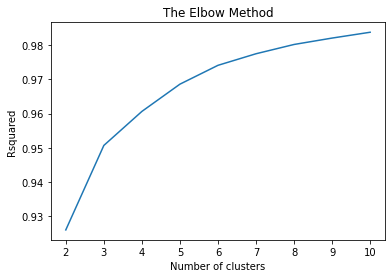

In [24]:
Rsquared = [0.926071651944956,0.9507073678905543,0.9606274403257087,0.9685776891804718,0.9740718411406839,0.9774471807568889,0.9801531938838558, 0.9820195454244275,0.9837180968616573]

plt.plot(range(2, 11), Rsquared)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Rsquared')
plt.show()

### By the above plot, it is pretty challeging to see the optimal kmeans. To me k=3,4,7 could work. At this point we are going to further examine at k = 3

### Center of cluster plots on both train and test data

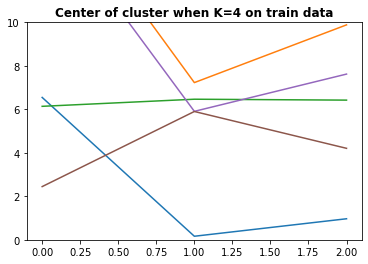

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rc

x=KMeans(n_clusters=3, n_init=100, max_iter=300, tol=10, verbose=0,random_state = 100).fit(bostonscaled)
x.fit_predict(bostonscaled)

centroids = x.cluster_centers_
labels = x.labels_
dataFrameClusterCenter=pd.DataFrame(centroids)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dataFrameClusterCenter)
ax.set_ylim(0, 10)
plt.title('Center of cluster when K=4 on train data',
          fontweight="bold")
plt.show()

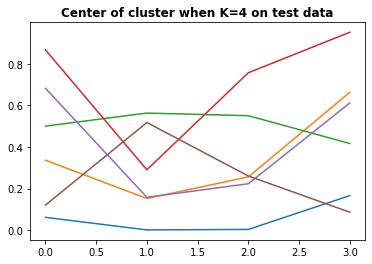

In [26]:
x=KMeans(n_clusters=4, n_init=100, max_iter=300, tol=0.0001, verbose=0,random_state = 100).fit(X_test_scaler)
x.fit_predict(X_test_scaler)

centroids = x.cluster_centers_
labels = x.labels_
dataFrameClusterCenter=pd.DataFrame(centroids)

plt.plot(dataFrameClusterCenter)
plt.title('Center of cluster when K=4 on test data',fontweight="bold")

plt.show()

In [27]:
# center of cluster on training data
clust=KMeans(n_clusters=3,max_iter=500,random_state=100).fit(bostonscaled)

#now extract the clusterCenters
clusterCenter=clust.cluster_centers_

#convert clusterCenter to dataframe to do the cluster profilin
ccd=pd.DataFrame(clusterCenter,columns=bostonscaled.columns)

#ccd for cluster profilin
print(ccd)

       CRIM      LSTAT        RM        AGE      INDUS       DIS
0  6.586425  16.890529  6.136353  91.995882  15.369235  2.441483
1  0.169936   7.180851  6.475596  26.942553   5.987234  5.912116
2  0.966490   9.819778  6.413311  62.386667   7.641667  4.260449


### In the above chart clusterId 0 is having the highest crime rate, where industry are more in clusterId 0              


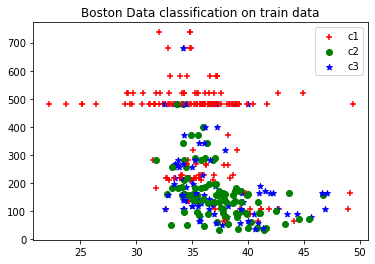

In [28]:
# plot the train data based on k=3 cluster
labels=clust.labels_

#total labes;
clusterIds=list(labels)

#now perform the inverse Scaling
originalDataAsNumpy=scaler.inverse_transform(bostonscaled)
#converting numpy to dataset
originalDataset=pd.DataFrame(originalDataAsNumpy,columns=bostonscaled.columns)

#adding the labelled column to the originalDataset
originalDataset["Label"]=labels

#to see whether data contains the label or not
originalDataset.Label[0]

##### Now plotting the Classfication 
import pylab as pl
len=originalDataset.shape[0]
len
for i in range(0, len):
   if originalDataset.Label[i] == 0:
      c1 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='r', marker='+')
   elif originalDataset.Label[i]  == 1:
      c2 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='g',marker='o')
   elif originalDataset.Label[i]  == 2:
      c3 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='b',marker='*')
   elif originalDataset.Label[i] == 3:
      c4 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='y',marker='^')
pl.legend([c1, c2, c3], ['c1','c2','c3'])  
pl.title('Boston Data classification on train data')
pl.show()

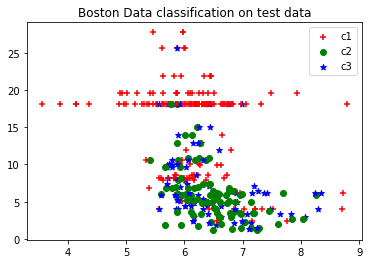

In [29]:
# plot on test data

originalDataAsNumpy=scaler.inverse_transform(X_test_scaler)
#converting numpy to dataset
originalDataset=pd.DataFrame(originalDataAsNumpy,columns=bostonscaled.columns)

#adding the labelled column to the originalDataset
originalDataset["Label"]=labels

#to see whether data contains the label or not
originalDataset.Label[0]

##### Now plotting the Classfication 
import pylab as pl
len=originalDataset.shape[0]
len
for i in range(0, len):
   if originalDataset.Label[i] == 0:
      c1 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='r', marker='+')
   elif originalDataset.Label[i]  == 1:
      c2 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='g',marker='o')
   elif originalDataset.Label[i]  == 2:
      c3 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='b',marker='*')
   elif originalDataset.Label[i] == 3:
      c4 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='y',marker='^')
pl.legend([c1, c2, c3], ['c1','c2','c3'])  
pl.title('Boston Data classification on test data')
pl.show()

### In the train model, my cluster size, proportions and R sqaureds are as below:
### when K = 3

The cluster sizes are [170  94  90]

The cluster proportions are [0.48  0.266 0.254]

The R-Square for 3 clusters is 0.9507073678905543

### In the test model, my cluster size, proportions and R sqaureds are as below:
### when K = 3
The cluster sizes are [126 113 115]

The cluster proportions are [0.356 0.319 0.325]

The R-Square for 3 clusters is 0.8132427700927725

#### Althought K-mean clustering does work and the R-sqaures seems high. However, there are a lot of overlapping on the clustering. I would not say it clustered well based on my variable selections and model ran. 

## Gaussian Mixtures Model

In [46]:
for i in range(3,6):
    
    mymixture = GaussianMixture(n_components=i,n_init=50,random_state=13511)
    mixresults=mymixture.fit(bostonscaled)
    labels = mymixture.predict(bostonscaled)

    print("\nAIC=", mymixture.aic(bostonscaled),i)
    print("\nBIC=",mymixture.bic(bostonscaled),i)


AIC= 9476.100361611192 3

BIC= 9797.252005401295 3

AIC= 7932.524906665954 4

BIC= 8362.016864023803 4

AIC= 7781.995112431932 5

BIC= 8319.827383357528 5


### component = 5 is has the lowest AIC and BIC

In [59]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

scaled_df = scaler.fit_transform(X_train) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 5) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3','P4','P5'] 
  
X_principal.head(2)

,P1,P2,P3,P4,P5
0,-0.330637,0.067404,0.017739,0.096716,-0.008718
1,-0.322001,0.132929,-0.019963,0.095841,-0.030695


In [60]:
gmm = GaussianMixture(n_components = 5) 
gmm.fit(X_principal)

GaussianMixture(n_components=5)

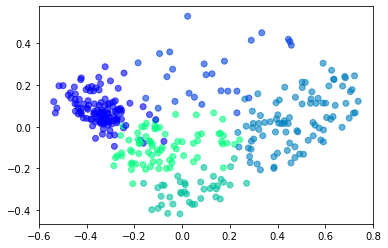

In [63]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'],X_principal['P2'],
           c = GaussianMixture(n_components = 5).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show() 

## Summary
By ploting the R-sqaured list in K-means model, there is no absolute optimal of cluster. I wonder if the variable I choose share too much smilarities or does not have too much correlation with house price. While GMM does give a better estimation on optimal number of clustering. From the center of cluster below, I can tell cluster0 has more crime rate more population with different education level and age range. More retail business in the area and closer to bosto employment center. While cluster1 looks like a better living environment for people according to its lower crime rateand younger population. cluter2 is in between 0 and 1.

In terms of price of the house, realtor could rise the price in cluter1 and be conservative with houses in cluster2. And expect to see more fluatuation on price in cluster0.

In [64]:
print(ccd)

       CRIM      LSTAT        RM        AGE      INDUS       DIS
0  6.586425  16.890529  6.136353  91.995882  15.369235  2.441483
1  0.169936   7.180851  6.475596  26.942553   5.987234  5.912116
2  0.966490   9.819778  6.413311  62.386667   7.641667  4.260449
